### 1) Bike Sharing Dataset

In [29]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [30]:
# Reading the dataset
df=pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [31]:
df1=df.copy()

In [32]:
df.shape

(730, 16)

In [33]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Which variables are significant in predicting the demand for shared bikes? How well do those variables describe the bike demands?

- Primarily we consider the following variables to describe bike demands:
    - Temperature (temp and atemp)
    - Weather situation (weathersit)
    - Day of the week (weekday)
    - Month (mnth)
    - Holiday status (holiday)
    - Working day (workingday)
    - Humidity (hum)
    - Windspeed (windspeed)

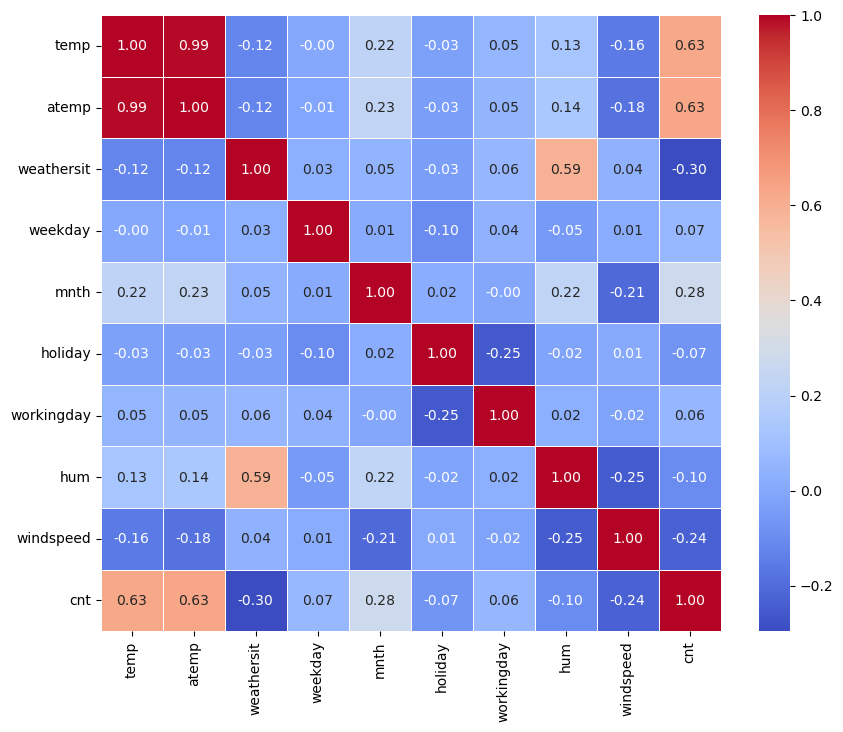

In [50]:
# Plotting a heatmap to find the correlation between multiple variables with bike demand
correlation_matrix = df[['temp', 'atemp', 'weathersit', 'weekday', 'mnth', 'holiday', 'workingday', 'hum', 'windspeed', 'cnt']].corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

- 'temp', 'atemp', 'hum', 'windspeed' have strong correlations with bike demand. So these are the variables we use for Multiple Linear Regression

#### Plot scatter plot for the given data

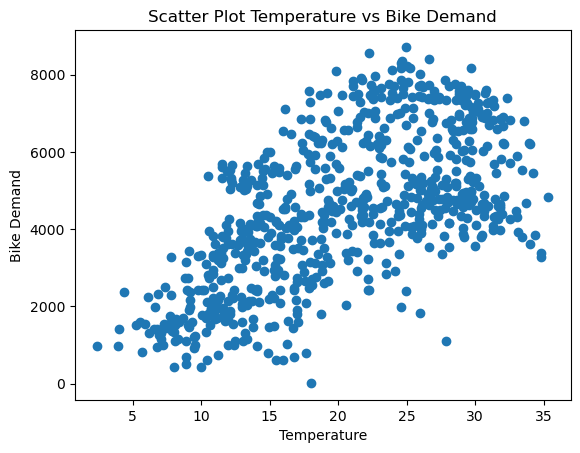

In [37]:
#Scatter Plot for Temperature vs Bike Demand 
plt.scatter(df['temp'],df['cnt'])
plt.title("Scatter Plot Temperature vs Bike Demand")
plt.xlabel("Temperature")
plt.ylabel("Bike Demand")
plt.show()

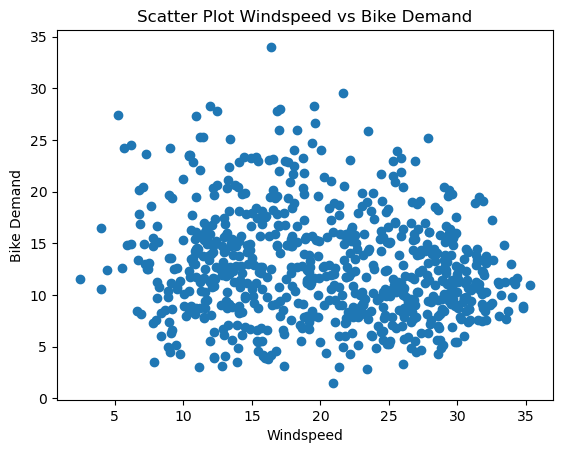

In [38]:
# Scatter Plot for Windspeed and Bike Demand
plt.scatter(df['temp'],df['windspeed'])
plt.title("Scatter Plot Windspeed vs Bike Demand")
plt.xlabel("Windspeed")
plt.ylabel("Bike Demand")
plt.show()

#### Apply scaler transform

In [39]:
# Applying scaler transform to the various columns
columns=['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [40]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,-0.827613,-0.680818,1.252343,-0.387833,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,-0.722069,-0.741507,0.480996,0.748899,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,-1.635432,-1.750344,-1.338073,0.745931,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,-1.615560,-1.610886,-0.261577,-0.389769,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,-1.468226,-1.505615,-1.340294,-0.046477,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,-1.319509,-1.521749,0.177576,2.059845,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,-1.324068,-1.347378,-0.264634,-0.452029,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,-1.324068,-1.425011,0.880424,-0.853182,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,-1.310404,-1.490698,-1.014341,2.067858,364,1432,1796


#### Are there any missing values

In [41]:
# Finding if the columns have any null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values in the dataset

#### Calculate slope and intercept for each factor

In [52]:
# Applying Multiple Linear Regression
X = df1[['temp', 'atemp', 'hum', 'windspeed', 'weathersit', 'holiday', 'workingday', 'weekday', 'mnth']]
y = df1['cnt']

In [43]:
X

,temp,atemp,hum,windspeed,weathersit,holiday,workingday,weekday,mnth
0,14.110847,18.18125,80.5833,10.749882,2,0,0,6,1
1,14.902598,17.68695,69.6087,16.652113,2,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1,0,1,1,1
3,8.200000,10.60610,59.0435,10.739832,1,0,1,2,1
4,9.305237,11.46350,43.6957,12.522300,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2,0,1,4,12
726,10.386653,12.75230,59.0000,10.416557,2,0,1,5,12
727,10.386653,12.12000,75.2917,8.333661,2,0,0,6,12
728,10.489153,11.58500,48.3333,23.500518,1,0,0,0,12


In [44]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_scaled = lr.predict(X_test)

In [47]:
a=lr.coef_
b=lr.intercept_,

In [48]:
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [-116.10268738  245.80922758  -23.38423822  -45.8648382  -429.36999822
 -649.30947649  120.61465006   62.71557218   98.05740395]
The estiamted model intercept is  (2796.791018810715,)


In [49]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)
print("The R2 score is:",r2)

The MSE value is:  2004690.659897719
The RMSE value is: 1415.8709898496115
The R2 score is: 0.41431983171251996


### 2) House Price Prediction

In [154]:
# Reading the dataset
df=pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [155]:
df1=df.copy()

In [156]:
df.shape

(545, 13)

In [157]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Which columns can be dropped for prediction in the given dataset

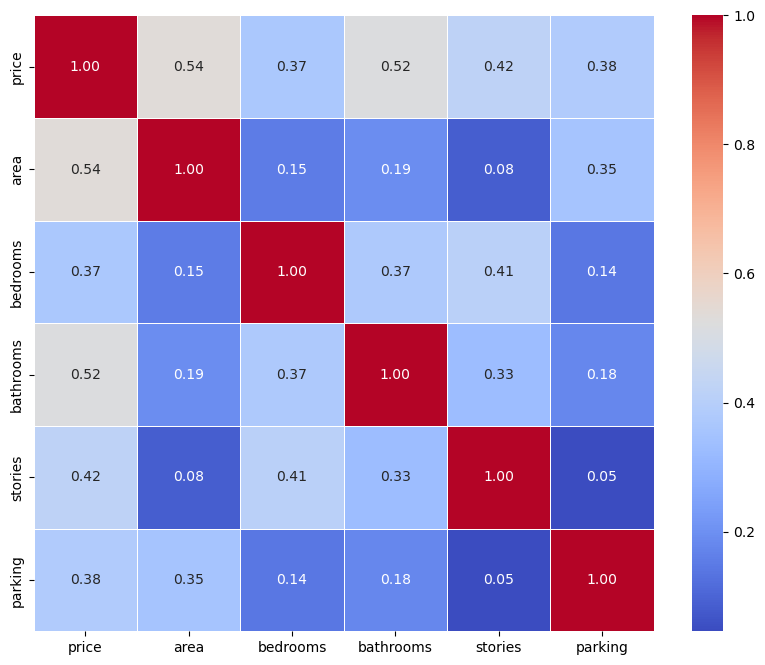

In [159]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

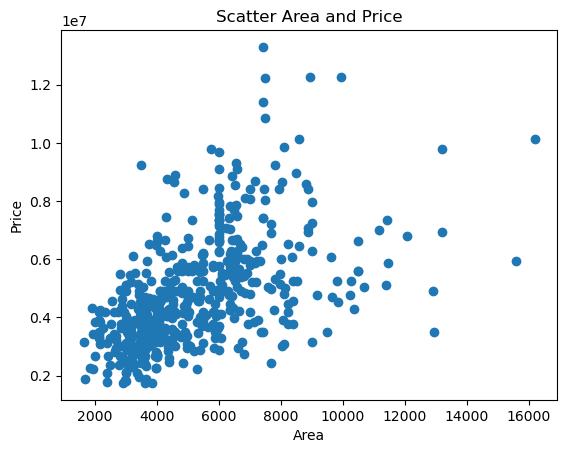

In [160]:
#Scatter Plot for Area vs Price
plt.scatter(df['area'],df['price'])
plt.title("Scatter Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

#### Calculate slope and intercept for each factor

In [163]:
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [164]:
X = df.drop('price', axis=1)
y = df['price']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [169]:
a=lr.coef_
b=lr.intercept_,

In [170]:
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
The estiamted model intercept is  (293083.0691506658,)


#### Calculate MAPE,MSE and RMSE

In [53]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)
print("The R2 score is:",r2)
print("The MAPE value is:", mape)

The MSE value is:  2004690.659897719
The RMSE value is: 1415.8709898496115
The R2 score is: 0.41431983171251996
The MAPE value is: 31.015779765980533
